## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec



In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
from top2vec import Top2Vec

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamesreno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,title,ingredients,directions,link,source,NER
0,7964,7964,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1,1765246,1765246,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
2,677031,677031,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
3,1325712,1325712,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
4,294137,294137,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [5]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [6]:
df.head()

,title,ingredients,directions,link,source,NER
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [16]:
#Final version of cleaning and preprocessing from EDA notebook
#taken from https://medium.com/geekculture/data-preprocessing-and-eda-for-natural-language-processing-56e45c1df36d

def remove_by_pos(sent):
    '''function to remove words according to part of speech tag'''
    words_retained=[]
    t = TextBlob(sent)
    for word, pos in t.tags:
        if (pos[0]!='V' and pos[0]!='R'):
            words_retained.append(word)
    
    return " ".join(words_retained)

def df_preprocessing(df,col_name,new_col_name):
    
    default_stopwords = stopwords.DEFAULT
   # adding some stop words as for measurements
    custom_stopwords = default_stopwords.union(set(["ingredient","cup","tablespoon","teaspoon","ounce","oz","tsp",\
                                                    "tbs", "pound","lb","c","recipe","g","gram"]))
    df[new_col_name]=[text.replace('\\u00b0','') for text in df[col_name]]
    
    #removing words by POS
    df[new_col_name]= [remove_by_pos(sent.lower()) for sent in df[new_col_name]]
    
   # cleaning
    df[new_col_name]= (
              df[new_col_name]
              .pipe(hero.clean)
              .pipe(hero.remove_html_tags)
              .pipe(hero.remove_brackets))
#               .pipe(hero.remove_urls))
    
    lemmatizer = WordNetLemmatizer()
    
    # lemmatization
    df[new_col_name]= df[new_col_name].apply(lambda x: \
                                             [lemmatizer.lemmatize(w) for w in x.split()])
    
    #joining split words into string for stopword removal
    df[new_col_name]= df[new_col_name].apply([lambda x: ' '.join(x)])
    
    #removing stop words
    
    df[new_col_name]=hero.remove_stopwords(df[new_col_name],custom_stopwords)
    return df

In [17]:
df_preprocessing(df,'ingredients','clean_ingredients')

,title,ingredients,directions,link,source,NER,clean_ingredients
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...
...,...,...,...,...,...,...,...
22306,Spring Rolls with Asian Chili-Lime Dipping Sauce,"[""Rice paper"", ""Bowl of warm water"", ""Sprouts""...","[""Dip rice paper into warm water to soften."", ...",www.foodnetwork.com/recipes/spring-rolls-with-...,Recipes1M,"[""paper"", ""water"", ""Sprouts"", ""carrots"", ""cabb...",rice paper bowl warm water sprout carrot napa ...
22307,Marlene'S Meat Loaf & Tomato Gravy,"[""2 lb. ground beef"", ""1 medium onion, chopped...","[""Combine all ingredients, except bacon."", ""Sh...",www.cookbooks.com/Recipe-Details.aspx?id=6656,Gathered,"[""ground beef"", ""onion"", ""eggs"", ""bread"", ""sal...",ground beef medium onion egg piece bread brea...
22308,Tuna Casserole,"[""1 12 cups dry elbow macaroni"", ""14 cup Itali...","[""1."", ""Cook noodles to al dente in boiling sa...",www.food.com/recipe/tuna-casserole-412249,Recipes1M,"[""macaroni"", ""Italian seasoned breadcrumbs"", ""...",dry elbow macaroni italian breadcrumb frenc...
22309,Peanut Brittle,"[""1 c. sugar"", ""1 c. raw peanuts"", ""1/2 c. Kar...","[""Cook sugar, raw peanuts and Karo syrup for 4...",www.cookbooks.com/Recipe-Details.aspx?id=703425,Gathered,"[""sugar"", ""peanuts"", ""syrup"", ""oleo"", ""vanilla...",sugar raw peanut karo syrup oleo vanilla ...


In [21]:
documents = [x for x in df['clean_ingredients']]

In [12]:
documents

['jar marshmallow creme pkg cream cheese philadelphia',
 ' russet yukon gold potato inch cube  low fat milk rice milk tb butter margarine  wasabi paste  green onion optional',
 ' loaf bread dough  brown sugar pkg regular vanilla pudding pie mix pkg regular butterscotch pie mix  butter margarine  milk  nut optional  raisin',
 ' cream half half large egg  pepper  salt  pork sausage',
 ' lean ground beef small onion bean l bean    tomato  green chilies  salt  pepper  pkg taco pkg ranch mix  water small sauce',
 'qt water  sugar   milk powder enough qt milk  salt tbsp    yeast packet  flour ',
 'lg potato stick butter dash allspice  nutmeg  cinnamon  vanilla  sugar pecan',
 ' sugar  white vinegar stick cinnamon whole clove soft peach',
 ' red kidney bean  salt tbsp peanut canola oil  onion tbsp garlic tbsp fresh ginger  tomato  tomato  ground coriander  cayenne  ground cumin fresh hot green chilie hungarian yellow pepper  fresh lemon juice',
 ' peanut skin  white almond bark chocolate chip

In [23]:
model = Top2Vec(documents,ngram_vocab=True)
#embedding_model='all-MiniLM-L6-v2',

2022-06-16 09:18:14,639 - top2vec - INFO - Pre-processing documents for training
2022-06-16 09:18:16,303 - top2vec - INFO - Creating joint document/word embedding


AttributeError: 'Word2VecKeyedVectors' object has no attribute 'get_normed_vectors'

In [35]:
model.get_num_topics()

56

In [36]:
model.get_topics()

(array([['recipe', 'recipe below', 'see recipe', ..., 'sandwich cookies',
         'strawberry jell', 'creamed corn'],
        ['recipe below', 'recipe', 'this recipe', ..., 'parsley',
         'chipotle peppers', 'raw shrimp'],
        ['recipe', 'recipe below', 'this recipe', ..., 'alfredo sauce',
         'meal', 'serving size'],
        ...,
        ['recipe below', 'broccoli', 'recipe', ..., 'crispy rice',
         'french fries', 'cottage cheese'],
        ['recipe below', 'recipe', 'zucchini', ..., 'tortilla chips',
         'biscuit mix', 'mozzarella cheese'],
        ['brussels sprouts', 'brussel sprouts', 'recipe below', ...,
         'potatoes', 'my recipe', 'pickled']], dtype='<U21'),
 array([[0.64994705, 0.64623046, 0.59551686, ..., 0.5070677 , 0.5034457 ,
         0.5030437 ],
        [0.68281054, 0.6497419 , 0.59841645, ..., 0.47999728, 0.47975326,
         0.47961658],
        [0.6097767 , 0.5720153 , 0.54786485, ..., 0.43150994, 0.43025374,
         0.4302336 ],
      

In [25]:
model.get_topic_sizes()

(array([425, 416, 393, 322, 293, 287, 263, 249, 247, 247, 207, 204, 203,
        202, 195, 183, 179, 176, 171, 170, 170, 168, 166, 162, 157, 157,
        152, 150, 150, 147, 147, 146, 145, 143, 143, 139, 138, 134, 131,
        130, 129, 127, 125, 125, 121, 121, 121, 120, 119, 119, 118, 118,
        117, 116, 116, 116, 115, 114, 114, 114, 113, 112, 112, 111, 110,
        110, 110, 109, 109, 108, 105, 105, 105, 104, 102, 102, 102, 101,
        101, 100,  99,  99,  99,  99,  97,  97,  96,  95,  94,  94,  94,
         94,  94,  93,  92,  92,  91,  91,  91,  88,  88,  88,  88,  87,
         87,  87,  86,  85,  84,  84,  84,  84,  83,  83,  82,  82,  81,
         81,  80,  80,  80,  80,  79,  79,  79,  78,  78,  76,  75,  75,
         75,  74,  74,  74,  73,  73,  73,  72,  72,  72,  72,  71,  71,
         71,  70,  70,  70,  69,  69,  68,  68,  68,  68,  67,  67,  67,
         66,  66,  66,  66,  66,  64,  64,  64,  64,  64,  63,  63,  63,
         62,  62,  62,  61,  61,  61,  61,  61,  61

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [37]:
vectors = model.document_vectors

In [38]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [39]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

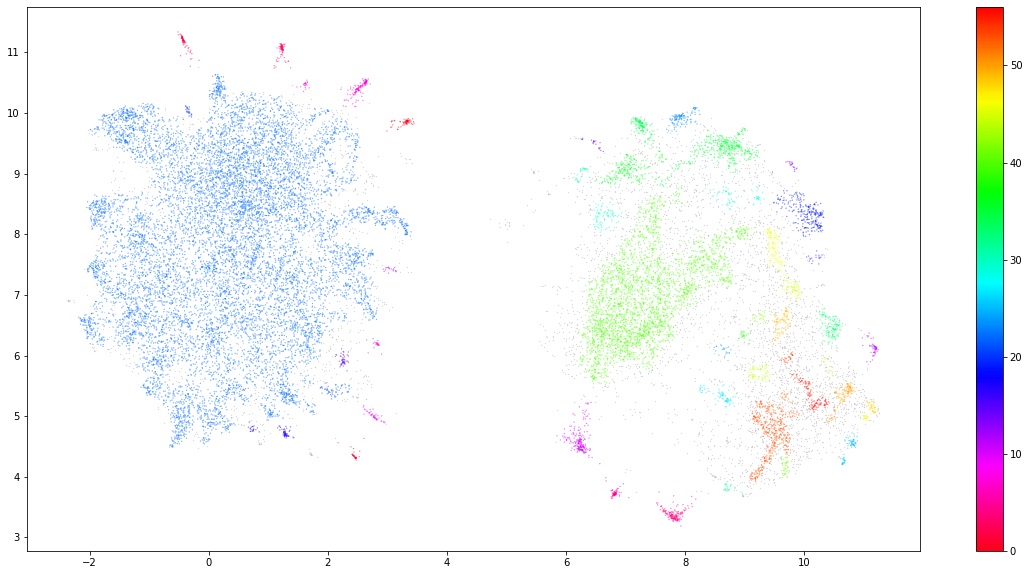

In [40]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [30]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [31]:
model.topic_words_reduced

array([['raspberries', 'extract', 'granulated', 'whipped', 'blueberries',
        'fruit', 'liqueur', 'sugar', 'powdered', 'confectioners',
        'almond', 'ice', 'peaches', 'vanilla', 'rum', 'pears',
        'strawberries', 'raspberry', 'peach', 'unsweetened', 'brandy',
        'chilled', 'caramel', 'cookie', 'blackberries', 'sweetened',
        'orange', 'icing', 'glaze', 'filling', 'banana', 'whites',
        'chocolate', 'softened', 'pecans', 'sifted', 'semisweet',
        'frosting', 'soda', 'yolks', 'jam', 'cocoa', 'tart', 'pure',
        'bananas', 'syrup', 'cherries', 'berries', 'graham',
        'maraschino'],
       ['soda', 'shortening', 'sifted', 'baking', 'quaker oats',
        'unsifted', 'flour', 'vanilla', 'extract', 'applesauce',
        'crisco', 'buttermilk', 'pecans', 'bran', 'cocoa', 'egg whites',
        'confectioners', 'sifted powdered', 'granulated', 'cinnamon',
        'sugar', 'sq', 'raisins', 'purpose', 'all', 'eggs',
        'almond bark', 'rolled', 'bana

In [32]:
model.topic_word_scores_reduced

array([[0.65400016, 0.64357245, 0.6430511 , 0.6365627 , 0.6319772 ,
        0.6234589 , 0.6187035 , 0.60998607, 0.60513914, 0.6009153 ,
        0.59123456, 0.5880622 , 0.5879829 , 0.58453125, 0.5803009 ,
        0.5759488 , 0.5724046 , 0.5707104 , 0.57053626, 0.5669534 ,
        0.56360245, 0.5560304 , 0.5407639 , 0.5402621 , 0.53686666,
        0.53441435, 0.5301211 , 0.528527  , 0.5283885 , 0.5283325 ,
        0.5276388 , 0.52655494, 0.5262363 , 0.5246583 , 0.5198008 ,
        0.5164312 , 0.51568556, 0.5119367 , 0.5099522 , 0.5088962 ,
        0.50868446, 0.5084374 , 0.5082421 , 0.50546   , 0.5048989 ,
        0.5045969 , 0.50425464, 0.50265276, 0.50185317, 0.49710223],
       [0.67489636, 0.67483884, 0.6676464 , 0.6579025 , 0.63212335,
        0.6186508 , 0.6145774 , 0.6054386 , 0.5999694 , 0.5994658 ,
        0.5931964 , 0.5808962 , 0.57244825, 0.56785405, 0.5652404 ,
        0.5632892 , 0.5574627 , 0.5546657 , 0.5534041 , 0.54937124,
        0.5478761 , 0.54355717, 0.5376996 , 0.5